# 파이썬 추천 시스템 패키지 - Surprise
* 파이썬 기반의 추천 시스템 구축을 위한 전용 패키지 중 하나
* 사이킷런와 유사한 API와 프레임워크를 제공
* 장점
    * 다양한 추천 알고리즘. ex) 사용자 또는 아이템 기반 최근접 이웃 협업 필터링, SVD, SVD++, NMF 기반의 잠재 요인 협업 필터링을 쉽게 적용
    * 사이킷런의 API와 유사한 API명. ex) fit(), predict(), train_test_split(), cross_validate(), GridSearchCV 클래스를 통한 모델 셀렉션, 평가, 하이퍼 파라미터 튜닝 등
* https://surprise.readthedocs.io/en/stable

### Surprise를 통한 추천시스템 구축

In [1]:
!pip install surprise

In [2]:
from surprise import SVD
from surprise import Dataset 
from surprise import accuracy 
from surprise.model_selection import train_test_split

In [3]:
#  데이터 세트 로딩
# ml-100k : 10만 개 평점 데이터 || ml-1m : 100만 개 평점 데이터
data = Dataset.load_builtin('ml-100k') # Y 입력
trainset, testset = train_test_split(data, test_size=.25, random_state=0) 

### 잠재 요인 협업 필터링 - SVD

In [4]:
algo = SVD()
algo.fit(trainset) 

In [5]:
# test() : 사용자-아이템 평점 데이터 세트 전체에 대해서 추천을 예측하는 메서드
# predict() : 개별 사용자와 여화에 대한 추천 평점을 반환
predictions = algo.test( testset )
print('prediction type :',type(predictions), ' size:',len(predictions))
print('prediction 결과의 최초 5개 추출')
predictions[:5]

prediction type : <class 'list'>  size: 25000
prediction 결과의 최초 5개 추출


[Prediction(uid='120', iid='282', r_ui=4.0, est=3.575450666058648, details={'was_impossible': False}),
 Prediction(uid='882', iid='291', r_ui=4.0, est=3.703662541531725, details={'was_impossible': False}),
 Prediction(uid='535', iid='507', r_ui=5.0, est=4.092153322390455, details={'was_impossible': False}),
 Prediction(uid='697', iid='244', r_ui=5.0, est=3.5408394882966205, details={'was_impossible': False}),
 Prediction(uid='751', iid='385', r_ui=4.0, est=3.50688873841351, details={'was_impossible': False})]

SVD 알고리즘 객체의 test(데이터 세트) 메서드의 호출 결과는 리스트로 입력 인자 데이터 세트의 크기와 같은 25,000개이다. 호출 결과로 반환된 리스트 객체는 25,000개의 Prediction 객체를 내부에 가지고 있다.

* Prediction 객체
    * Surprise 패키지에서 제공하는 데이터 타입
    * 개별 사용자 아이디(uid)
    * 영화 또는 아이템 아이디(iid)
    * 실제 평점(r_ui)
    * 실제 평점 기반 추천 예측 평점(est)
    * 튜플 형태

In [6]:
[ (pred.uid, pred.iid, pred.est) for pred in predictions[:3] ]

[('120', '282', 3.575450666058648),
 ('882', '291', 3.703662541531725),
 ('535', '507', 4.092153322390455)]

* predict() - 추천 예측
    * 개별 사용자의 아이템에 대한 추천 평점을 예측.
    * 인자 : 개별 상요자 아이디, 아이템 아이디
    * 추천 예측 평점을 포함한 정보 반환

In [7]:
# 사용자 아이디, 아이템 아이디는 문자열로 입력
uid = str(196)
iid = str(302)
pred = algo.predict(uid, iid)
print(pred)

user: 196        item: 302        r_ui = None   est = 4.14   {'was_impossible': False}


* est : 추천 예측 평점

In [8]:
# 테스트 데이터 세트를 이용하여 추천 예측 평점과 실제 평점 차이를 평가
# accuracy 모듈은 RMSE와 MSE 등의 방법으로 추천 시스템 성능 평가 정보를 제공한다.
accuracy.rmse(predictions)

RMSE: 0.9467


0.9467020264713211

# Surprise 주요 모듈

### Dataset
* Surprise는 user_id(사용자 아이디), item_id(아이템 아이디), rating(평점) 데이터가 로우 레벨로 된 데이터 세트만 적용할 수 있다. - index와 header를 삭제한 csv 파일을 불러야함
* 데이터 세트의 칼럼 순서가 사용자 아이디, 아이템 아이디, 평점 순으로 되어 있어야 한다.

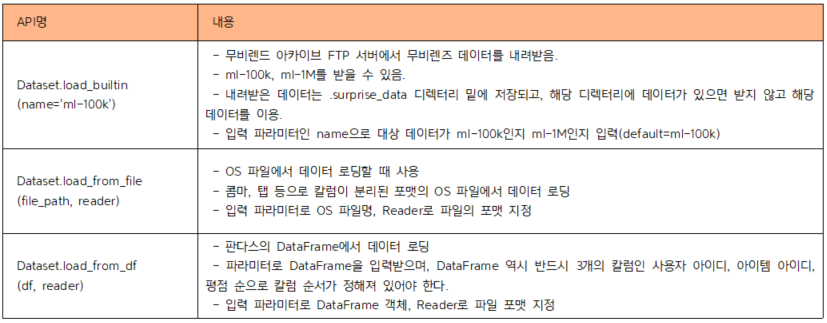

### OS 파일 데이터를 Surprise 데이터 세트로 로딩
* 데이터 파일에 칼럼을 가지는 헤더 문자열이 있으면 안된다 - 헤더 삭제

In [9]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/09_Recommendations/data/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
# ratings_noh.csv 파일로 언로드 시 인덱스와 헤더를 모두 제거한 새로운 파일 생성
ratings.to_csv('ratings_noh.csv', index=False, header=False)

* ratings_noh.csv는 칼럼 헤더 없고, 4개의 칼럼이 콤마로만 분리되어 있다.
* 이 4개의 칼럼이 사용자 아이디, 아이템 아이디, 평점, 타임스탬프임을 로딩할 때 알려줘야 한다.
* Reader 클래스의 생성자에 각 필드의 칼럼명과 칼럼 분리문자, 그리고 최소~최대 평점을 입력해 객체를 생성하고, load_from_file()로 생성된 Reader 객체를 참조해 데이터 파일을 파싱하면서 로딩

In [11]:
# Reader
# 생성 시 line_format 인자로 user, item, rating, timestamp의 4개의 칼럼으로 데이터가 구성되어 있음을 명시
# 각 칼럼의 분리 문자는 콤마, 평점의 단위는 0.5, 최대 평점을 5로 설정
from surprise import Reader

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
data=Dataset.load_from_file('ratings_noh.csv',reader=reader)

* Reader 클래스의 주요 생성 파라미터
    * line_format(string) : 칼럼을 순서대로 나열. 입력된 문자열을 공백으로 분리해 칼럼으로 인식
    * sep(char) : 칼럼을 분리하는 분리자이며, 디폴트는 '\t'이다. 판다스 DataFrame을 입력받을 경우에는 기재할 필요가 없다.
    * rating_scale(tuple, optional) : 평점 값의 최소 ~ 최대 평점을 설정. 디폴트=(1, 5)

##### SVD 행렬 분해 기법을 이용해 추천 예측
* 잠재 요인 크기 K 값을 나타내는 파라미터인 n_factors를 50으로 설정

In [12]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)

# 학습 데이터 세트로 학습 후 테스트 데이터 세트로 평점 예측 후 RMSE 평가
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### 판다스 DataFrame에서 Surprise 데이터 세트로 로딩


In [13]:
import pandas as pd
from surprise import Reader, Dataset

ratings = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/09_Recommendations/data/ratings.csv')
reader = Reader(rating_scale=(0.5, 5.0))

# ratings DataFrame 에서 컬럼은 사용자 아이디, 아이템 아이디, 평점 순서를 지켜야 합니다. 
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset) 
predictions = algo.test( testset )
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

### Surprise 추천 알고리즘 클래스

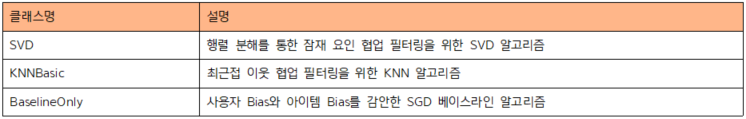

* 이 밖에도 SVD++, NMF 등 다양한 유형의 알고리즘 수행 가능
* http://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html
* Surprise SVD의 비용함수는 사용자 베이스라인(Baseline) 편향성을 감안한 평점 예측에 Regularization을 적용
    
    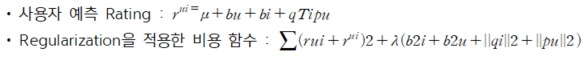


* SVD 클래스의 입력 파라미터.
    * 주로 n_factors와 n_epochs의 값을 변경해 튜닝할 수 있으나 튜닝 효과는 크지 않다.
    * biased의 경우 큰 이슈가 없는 한 디폴트인 True로 설정하는 것이 좋다.

    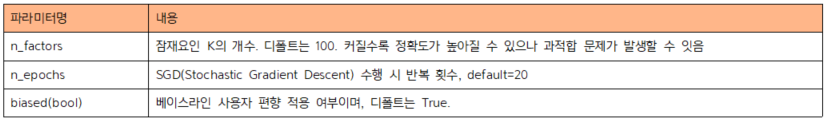

* 추천 알고리즘의 예측 성능 벤치마크 결과 : http://surpriselib.com

    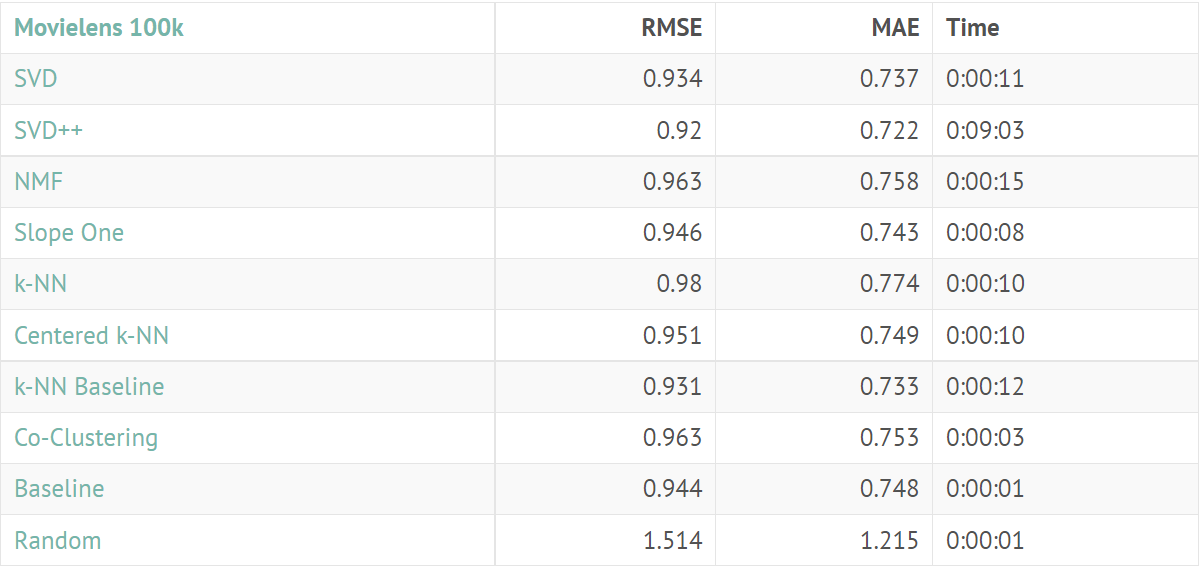

SVD++ 알고리즘의 RMSE, MAE 성정이 가장 좋지만, 상대적으로 시간이 너무 오래 걸려 데이터가 조금만 커져도 사용하기가 어렵다.

SVD++를 제외하고 SVD와 k-NN Baseline이 가장 성능 평가 수치가 좋다. k-NN 자체는 성능이 상대적으로 뒤지지만, Baseline을 결합한 경우 성능 평가 수치가 대폭 향상되었다. 

Baseline이라는 의미는 각 개인이 평점을 부여하는 성향을 반영해 평점을 계산하는 방식을 말함.

#### 베이스라인 평점
* 개인의 성향을 반영해 아이템 평가에 편향성(bias) 요소를 반영하여 평점을 부과하는 것
* 보통 전체 평균 평점 + 사용자 편향 점수 + 아이템 편향 점수 공식으로 계산
    * 전체 평균 평점 = 모든 사용자의 아이템에 대한 평점을 평균한 값
    * 사용자 편향 점수 = 사용자별 아이템 평점 평균 값 - 전체 평균 평점
    * 아이템 편향 점수 = 아이템별 평점 평균 값 - 전체 평균 평점

### 교차 검증과 하이퍼 파라미터 튜닝
* Surprise의 교차 검증과 하이퍼 파라미터 튜닝을 위해 cross_validate()와 GridSearchCV 클래스.

In [14]:
from surprise.model_selection import cross_validate 

# Pandas DataFrame에서 Surprise Dataset으로 데이터 로딩 
ratings = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/09_Recommendations/data/ratings.csv') # reading data in pandas df
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

algo = SVD(random_state=0) 
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True) 

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8723  0.8832  0.8690  0.8688  0.8727  0.8732  0.0053  
MAE (testset)     0.6729  0.6765  0.6659  0.6673  0.6687  0.6703  0.0039  
Fit time          5.69    5.83    5.66    5.44    5.65    5.66    0.12    
Test time         0.20    0.31    0.31    0.17    0.37    0.27    0.08    


{'fit_time': (5.689021587371826,
  5.831506013870239,
  5.657784938812256,
  5.444346904754639,
  5.654849290847778),
 'test_mae': array([0.67287775, 0.67654543, 0.66589122, 0.66734685, 0.66869423]),
 'test_rmse': array([0.87227212, 0.8832055 , 0.86902316, 0.8687749 , 0.87268948]),
 'test_time': (0.20057249069213867,
  0.30837392807006836,
  0.309337854385376,
  0.16796588897705078,
  0.3735024929046631)}

cross_validate()는 폴드별 성능 평가 수치와 전체 폴드의 평균 성능 평가 수치를 함께 보여준다.

In [15]:
# GridSearchCV
# 반복 횟수를 지정하는 n_epochs, 잠재 요인 K의 크기를 지정하는 n_factors를 튜닝
from surprise.model_selection import GridSearchCV

# 최적화할 파라미터들을 딕셔너리 형태로 지정. 
param_grid = {'n_epochs': [20, 40, 60], 'n_factors': [50, 100, 200] }

# CV를 3개 폴드 세트로 지정, 성능 평가는 rmse, mse 로 수행 하도록 GridSearchCV 구성
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# 최고 RMSE Evaluation 점수와 그때의 하이퍼 파라미터
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8767762658419045
{'n_epochs': 20, 'n_factors': 50}


'n_epochs':20, 'n_factors':50일 때 3개 폴드의 검증 데이터 세트에서 최적 RMSE가 0.878로 도출되었다.

### Surprise를 이용한 개인화 영화 추천 시스템 구축

In [16]:
# 이 코드는 train_test_split()으로 분리되지 않는 데이터 세트에 fit()을 호출해 오류가 발생한다.
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
algo = SVD(n_factors=50, random_state=0)
algo.fit(data)

AttributeError: ignored

In [17]:
# 데이터 세트 전체를 학습 데이터로 사용하려면 DatasetAutoFolds 클래스를 이용
from surprise.dataset import DatasetAutoFolds

reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(0.5, 5))
# DatasetAutoFolds 클래스를 ratings_noh.csv 파일 기반으로 생성. 
data_folds = DatasetAutoFolds(ratings_file='ratings_noh.csv', reader=reader)

#전체 데이터를 학습데이터로 생성함. 
trainset = data_folds.build_full_trainset()

In [18]:
# SVD 수행
algo = SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [19]:
# 영화에 대한 상세 속성 정보 DataFrame 로딩
movies = pd.read_csv('/content/drive/MyDrive/파이썬_머신러닝_완벽가이드/09_Recommendations/data/movies.csv')

# userId=9의 movieId 데이터를 추출해 movieId=42 데이터가 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('사용자 아이디 9는 영화 아이디 42의 평점 없음')

print(movies[movies['movieId']==42])

사용자 아이디 9는 영화 아이디 42의 평점 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama


이 movieId 42인 영화에 대해서 userId 9 사용자의 추천 예상 평점은 predict() 메서드를 이용하면 알 수 있다. 학습된 SVD 객체에서 predict() 메서드 내에 userId와 movieId 값을 입력해주면 된다.

In [20]:
uid, iid = '9', '42'
pred = algo.predict(uid, iid, verbose=True)

user: 9          item: 42         r_ui = None   est = 3.13   {'was_impossible': False}


추천 예측 평점을 est값으로 3.13이다.

#### 추천 대상이 되는 영화 추출

In [21]:
def get_unseen_surprise(ratings, movies, userId):
    #입력값으로 들어온 userId에 해당하는 사용자가 평점을 매긴 모든 영화를 리스트로 생성
    seen_movies = ratings[ratings['userId']== userId]['movieId'].tolist()
    
    # 모든 영화들의 movieId를 리스트로 생성. 
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movieId중 이미 평점을 매긴 영화의 movieId를 제외하여 리스트로 생성
    unseen_movies= [movie for movie in total_movies if movie not in seen_movies]
    print('평점 매긴 영화수:',len(seen_movies), '추천대상 영화수:',len(unseen_movies), \
          '전체 영화수:',len(total_movies))
    
    return unseen_movies

unseen_movies = get_unseen_surprise(ratings, movies, 9)

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742


* 학습된 추천 알고리즘 클래스인 SVD를 이용하여 높은 예측 평점을 가진 순으로 영화를 추천

In [22]:
# 인자 : 학습이 완료된 추천 알고리즘 객체, 추천 대상 사용자 아이디, 추천 대상 영화의 리스트 객체, 그리고 추천 상위 N개 개수를 받음
def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions list 객체는 surprise의 Predictions 객체를 원소로 가지고 있음.
    # [Prediction(uid='9', iid='1', est=3.69), Prediction(uid='9', iid='2', est=2.98),,,,]
    # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_est 함수를 정의함.
    # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est( ) 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
    predictions.sort(key=sortkey_est, reverse=True)
    top_predictions= predictions[:top_n]
    
    # top_n으로 추출된 영화의 정보 추출. 영화 아이디, 추천 예상 평점, 제목 추출
    top_movie_ids = [ int(pred.iid) for pred in top_predictions]
    top_movie_rating = [ pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    top_movie_preds = [ (id, title, rating) for id, title, rating in zip(top_movie_ids, top_movie_titles, top_movie_rating)]
    
    return top_movie_preds

unseen_movies = get_unseen_surprise(ratings, movies, 9)
top_movie_preds = recomm_movie_by_surprise(algo, 9, unseen_movies, top_n=10)
print('##### Top-10 추천 영화 리스트 #####')

for top_movie in top_movie_preds:
    print(top_movie[1], ":", top_movie[2])

평점 매긴 영화수: 46 추천대상 영화수: 9696 전체 영화수: 9742
##### Top-10 추천 영화 리스트 #####
Usual Suspects, The (1995) : 4.306302135700814
Star Wars: Episode IV - A New Hope (1977) : 4.281663842987387
Pulp Fiction (1994) : 4.278152632122759
Silence of the Lambs, The (1991) : 4.226073566460876
Godfather, The (1972) : 4.1918097904381995
Streetcar Named Desire, A (1951) : 4.154746591122658
Star Wars: Episode V - The Empire Strikes Back (1980) : 4.122016128534504
Star Wars: Episode VI - Return of the Jedi (1983) : 4.108009609093436
Goodfellas (1990) : 4.083464936588478
Glory (1989) : 4.07887165526957


# 정리

* 추천 시스템
    * 콘텐츠 기반 필터링
        * 아이템(상품, 영화, 서비스 등)을 구성하는 여러 가지 콘텐츠 중 사용자가 좋아하는 콘텐츠를 필터링하여 이에 맞는 아이템을 추천하는 방식
    * 협업 필터링
        * 최근접 이웃 협업 필터링
            * 사용자 기반(사용자-사용자)
            * 아이템 기반(아이템-아이템) -> 더 많이 사용됨
                * 기준 : 사용자들의 아이템에 대한 평가를 벡터화한 값
                * 모든 아이템을 행으로, 모든 사용자를 열로, 그리고 사용자별-아이템 평점을 값으로 하는 아이템-사용자 행렬 데이터 세트를 만들고, 아이템별로 코사인 유사도를 이용해 사용자 평점 피처 벡터에 따른 TOP-N 유사 아이템을 추천.
        * 잠재 요인 협업 필터링
            * 많은 추천 시스템에서 활용하는 방식
            * 사용자-아이템 평점 행렬 데이터에 숨어 있는 잠재 요인을 추출하여 사용자가 아직 평점을 매기지 않은 아이템에 대한 평점을 예측하여 이를 추천에 반영
            * 잠재 요인 추출
                * 다차원의 사용자-아이템 평점 행렬 --- 분해 --> 저차원의 사용자-잠재요인, 아이템-잠재요인.
                * 행렬 분해 이용 -> 경사 하강법르로 구현

* Surprise
    * 파이썬 추천 패키지 중 하나.
    
